In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load your dataset
file_path = '/content/drive/MyDrive/ML assignment data/creditcard.csv'
data = pd.read_csv(file_path)



In [4]:
# Step 3: Prepare features and labels
X = data.drop('Class', axis=1)  # 'Class' column is the target (0 = normal, 1 = fraud)
y = data['Class']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature scaling (VERY important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)  # class_weight helps with imbalanced data
model.fit(X_train_scaled, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[55478  1386]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



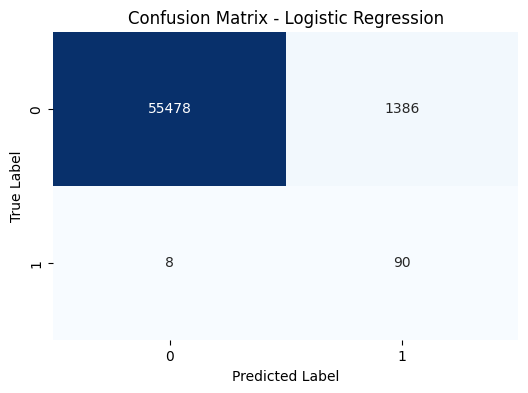

In [5]:
# Step 9: Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()